In [1]:
import pint
u = pint.UnitRegistry()
pint.UnitRegistry(system='mks')
import numpy as np
import pylab as plt
import os

In [37]:
σ   = 5.67e-8           #* u.W / u.m**2 / u.K**4   # W/m²/K⁴ Stefan-Boltzman constant
c   = 2.999e8           #* u.m / u.s   # m/s
h   = 6.582119569e-34   #* u.J * u.s   # Js
e   = 1.602176634e-19   #* u.A / u.s   # As
k_B = 1.38064852e-23    #* u.J / u.K   # J/K 
T0  = 273.16            # K       0 = C
Sc  = 1367.0            # W / m²  solar constant
Sd  = 1.496e11          # m
SR  = 6.96342e8         # m
TS  = 5778.0            # K

SL  = σ * TS**4 * 4.0 * np.pi * SR**2
Sc2 = σ * TS**4 *  SR**2 / Sd**2 
print("PS/m² = %9.3e  PS = %9.3e  Sc = %9.3e  Sc2 = %9.3e" % ((σ * TS**4), SL, Sc, Sc2))

PS/m² = 6.320e+07  PS = 3.851e+26  Sc = 1.367e+03  Sc2 = 1.369e+03


In [ ]:
def ufunc(λ, T):
    x = h * c / (k_B * T * λ)
    U = 2.0 * np.pi * h * c**2 / λ**5 / (np.exp(x) - 1.0)
    return U

λ   = np.mgrid[1.0e-8:4.0e-4:20000j]
US  = ufunc(λ, T) * SR**2 / Sd**2
UIR = ufunc(λ, 288.0)
print("sum(US) Δλ = %9.3e W/m², sum(UIR) Δλ = %9.3e W/m²" % (np.sum(US) * (λ[1] - λ[0]), np.sum(UIR) * (λ[1] - λ[0])))

λ   = np.mgrid[1.0e-8:4.0e-5:20000j]
US  = ufunc(λ, T) * SR**2 / Sd**2
UIR = ufunc(λ, 288.0)
plt.plot(λ*1.0e6,US*1.0e-6,'r')
plt.plot(λ*1.0e6,UIR*1.0e-6,'b')

plt.figure()
λ = np.mgrid[3.0e-6:4.0e-5:2000j]
US = ufunc(λ, T) * SR**2 / Sd**2
UIR = ufunc(λ, 280.0)
plt.plot(λ*1.0e6,US*1.0e-6,'r')
plt.plot(λ*1.0e6,UIR*1.0e-6,'b')


In [ ]:
λ = np.mgrid[13.0e-6:17.0e-6:2000j]
US = ufunc(λ, T) * SR**2 / Sd**2
UIR = ufunc(λ, 280.0)

print("sum(US) Δλ = %9.3e W/m², sum(UIR) Δλ = %9.3e W/m²" % (np.sum(US) * (λ[1] - λ[0]), np.sum(UIR) * (λ[1] - λ[0])))

<div> <img src="energy_balance_detailed.png" width=400> </div>

## Intensity balance
(1) $(1-u) I_s - I_e + I_l = 0$

(2) $I_s - I_l - (1-v) I_e = 0$

Transform (1):   
$I_l = I_e - (1-u) I_s$

Insert into (2):   
$I_s - (I_e - (1-u) I_s) - (1-v) I_e = 0$


$I_s + (1-u) I_s = I_e + (1-v) I_e$

$(2-u) I_s = (2-v) I_e$

$I_e = I_s \dfrac{2-u}{2-v}$

With (1):   
$I_l = I_s \left(\dfrac{2-u}{2-v} - (1-u)\right)$


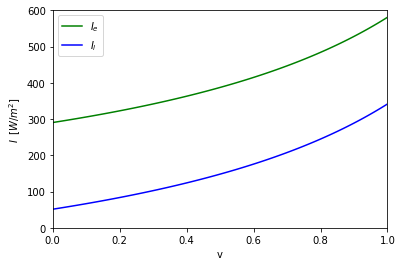

In [34]:
u = 0.3
v = np.mgrid[0.0:1.0:100j]
Is = Sc/4.0
Ie = Is * (2.0-u)/(2.0-v)
Il = Is * ((2.0-u)/(2.0-v) - (1-u))
plt.plot(v, Ie, 'g', label="$I_e$")
plt.plot(v, Il, 'b', label="$I_l$")
plt.xlabel("v")
plt.ylabel("$I\;\; [W/m^2]$")
plt.legend(loc='best')
plt.axis([0.0, 1.0, 0.0, 600.0])
plt.savefig("I_vs_v.png")

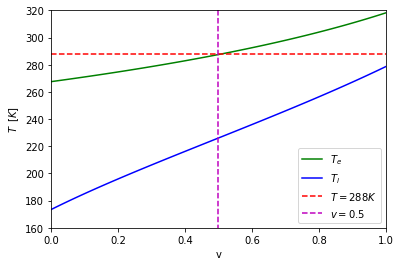

In [35]:
Te = np.sqrt(np.sqrt(Ie/σ))
Tl = np.sqrt(np.sqrt(Il/σ))
plt.plot(v, Te, 'g', label="$T_e$")
plt.plot(v, Tl, 'b', label="$T_l$")
plt.plot([0.0,1.0], [288.0, 288.0], 'r--', label="$T = 288 K$")
plt.plot([0.5,0.5], [320.0, 160.0], 'm--', label="$v = 0.5$")
plt.xlabel("v")
plt.ylabel("$T\;\; [K]$")
plt.legend(loc='best')
plt.axis([0.0, 1.0, 160, 320])
plt.savefig("T_vs_v.png")